# DCSI 503 - Project 03
### Dustin Berry

In [1]:
import numpy as np
import pandas as pd              
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
Loading the DataFrame and exploring the structure.

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


This section will show the determination of the size of the dataset.

In [3]:
print(diamonds.shape)

(53940, 10)


Here we will inspect the distribution of the columns within the Diamonds dataset.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
This will show information regarding the five most expensive diamonds.

In [5]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].\
    sort_values(by='price', ascending=False).head()

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


This will show information regarding the five least expensive diamonds.

In [6]:
diamonds.loc[:, ['price', 'carat', 'cut', 'color', 'clarity']].\
    sort_values(by='price').head()

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


Here we will see information on the five largest diamonds with an ideal cut.

In [7]:
diamonds.loc[diamonds['cut']=='Ideal', ['price', 'carat', 'cut', 'color', 'clarity']].\
    sort_values(by='carat', ascending=False).head()

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


Here we will see information on the five largest diamonds with an fair cut.

In [8]:
diamonds.loc[diamonds['cut']=='Fair', ['price', 'carat', 'cut', 'color', 'clarity']].\
    sort_values(by='carat', ascending=False).head()

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
This section will show how to create lists to specify the order of each of the three categorical variables.

In [9]:
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

The following syntax allows us to communicate the above lists to Pandas to correct the order in which the categorical variables are valued.

In [10]:
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.color = pd.Categorical(diamonds.color, color_levels)
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)

Here we'll create a set of lists to name colors to serve as palattes for future visualizations.

In [11]:
clarity_pal = ['darkslateblue', 'hotpink', 'aqua', 'green', 
               'orangered', 'darkorchid', 'black', 'mediumblue']
color_pal = ['lime', 'cyan', 'tomato', 'saddlebrown', 'dimgrey', 
             'mintcream', 'orchid']
cut_pal = ['rosybrown', 'chartreuse', 'royalblue', 'plum', 'gold']

## Part 4: Displaying Counts for Categorical Variables
First we will count the number of diamonds for each level of cut.

In [12]:
diamonds.cut.value_counts().sort_index()

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

Now we will count the number of diamonds for each level of color.

In [13]:
diamonds.color.value_counts().sort_index()

J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: color, dtype: int64

The following syntax will show the number of diamonds for each level of clarity.

In [14]:
diamonds.clarity.value_counts().sort_index()

I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: clarity, dtype: int64

## Part 5: Scatterplots of Price Against Carat
Here we will see the relationship between price and carat.

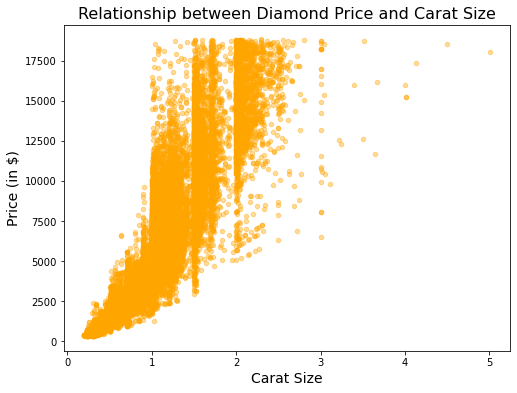

In [15]:
plt.figure(figsize=[8,6])

plt.scatter(diamonds.carat, diamonds.price, s=20, alpha=0.4, color='orange')

plt.xlabel('Carat Size', fontsize=14)
plt.ylabel('Price (in $)', fontsize=14)
plt.title('Relationship between Diamond Price and Carat Size', fontsize=16)

plt.show()

The following plot will represent the same information as above with the points separated by color representing the clarity of each diamond.

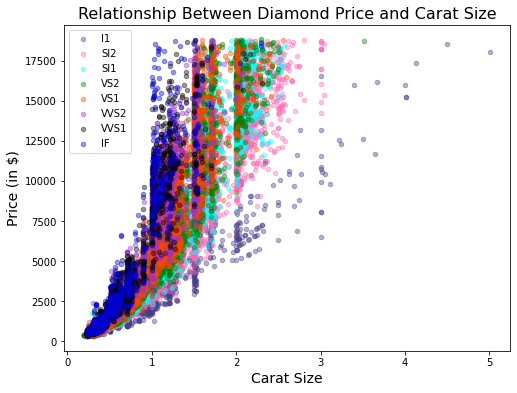

In [16]:
plt.figure(figsize=[8,6])

for i in range(len(clarity_levels)):
    
    df_sub = diamonds[diamonds.clarity == clarity_levels[i]]
    plt.scatter(df_sub.carat, df_sub.price, s=20, alpha=0.4,
                color=clarity_pal[i], label=clarity_levels[i])

plt.xlabel('Carat Size', fontsize=14)
plt.ylabel('Price (in $)', fontsize=14)
plt.title('Relationship Between Diamond Price and Carat Size', fontsize=16)
plt.legend()

plt.show()

This will separate the points for each of the eight clarity levels into its own subplot.

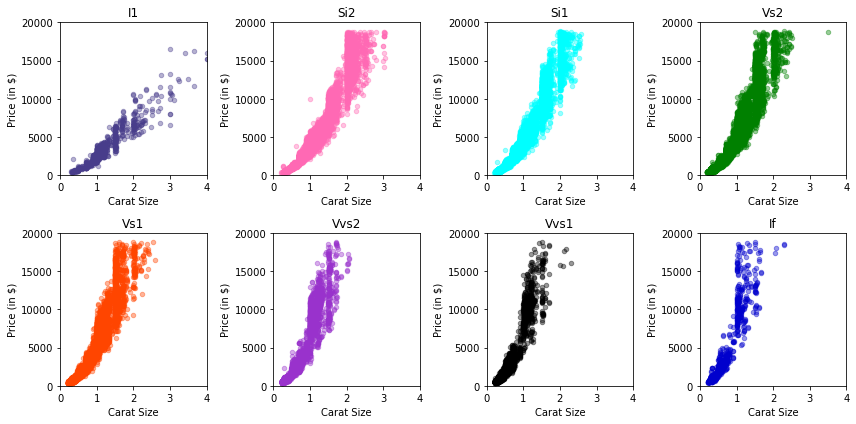

In [17]:
plt.figure(figsize=[12,6])

for i in range(0,len(clarity_levels)):
    
    temp_df = diamonds[diamonds.clarity == clarity_levels[i]]
    
    plt.subplot(2,4,i+1)

    plt.scatter(temp_df.carat, temp_df.price, s=20, alpha=0.4, 
                color=clarity_pal[i])
    
    plt.xlim([0,4])
    plt.ylim([0,20000])
    plt.xlabel('Carat Size')
    plt.ylabel('Price (in $)')
    plt.title(np.char.capitalize(clarity_levels[i]))
    
plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations
Now we need to add two new columns to the diamonds dataset in order to store the natural log of carat and price.

In [18]:
diamonds.loc[:,'ln_carat'] = np.log(diamonds.loc[:,'carat'])
diamonds.loc[:,'ln_price'] = np.log(diamonds.loc[:,'price'])

Here we will use histograms to explore both the distribution and natural log of the diamond prices.

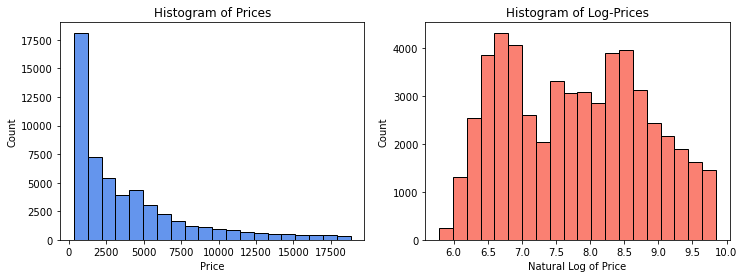

In [19]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist(diamonds.price, color='cornflowerblue', edgecolor='k', bins=20)
plt.title('Histogram of Prices')
plt.ylabel('Count')
plt.xlabel('Price')

plt.subplot(1,2,2)
plt.hist(diamonds.ln_price, color='salmon', edgecolor='k', bins=20)
plt.title('Histogram of Log-Prices')
plt.ylabel('Count')
plt.xlabel('Natural Log of Price')

plt.show()

Here we will use histograms to explore both the distribution and natural log of the diamond carat sizes.

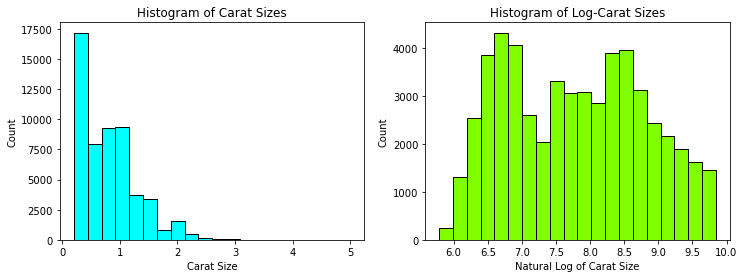

In [20]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.hist(diamonds.carat, color='cyan', edgecolor='k', bins=20)
plt.title('Histogram of Carat Sizes')
plt.ylabel('Count')
plt.xlabel('Carat Size')

plt.subplot(1,2,2)
plt.hist(diamonds.ln_price, color='chartreuse', edgecolor='k', bins=20)
plt.title('Histogram of Log-Carat Sizes')
plt.ylabel('Count')
plt.xlabel('Natural Log of Carat Size')

plt.show()

## Part 7: Scatterplot of Transformed Variables
The following scatterplot will display the natural log of price against the natural log of carat size with point colors representing the various levels of clarity.

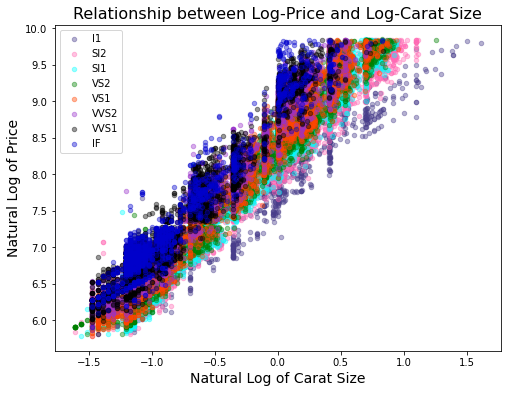

In [21]:
plt.figure(figsize=[8,6])

for i in range(len(clarity_levels)):
    
    df_sub = diamonds[diamonds.clarity == clarity_levels[i]]
    plt.scatter(df_sub.ln_carat, df_sub.ln_price, s=20, alpha=0.4,
                color=clarity_pal[i], label=clarity_levels[i])

plt.xlabel('Natural Log of Carat Size', fontsize=14)
plt.ylabel('Natural Log of Price', fontsize=14)
plt.title('Relationship between Log-Price and Log-Carat Size', fontsize=16)
plt.legend()

plt.show()

## Part 8: Grouping by Cut
This section will be used to create a grouped dataframe displaying the mean price and carat size for each cut level.

In [22]:
gb_cut = diamonds.loc[:, ['cut', 'price', 'carat']].\
    groupby(['cut']).mean()

gb_cut

,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


Here we will use bar charts to graphically display the information contained in the new gb_cut dataframe.

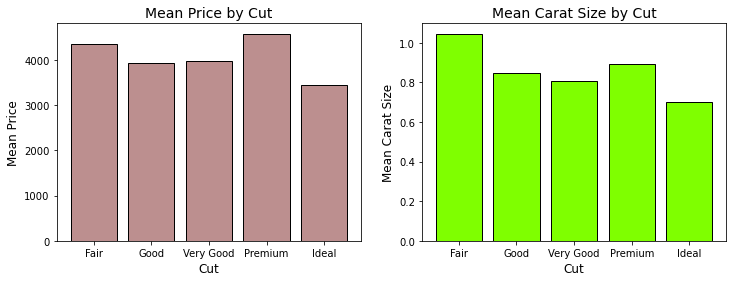

In [23]:
plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.bar(gb_cut.index, height=gb_cut.price, edgecolor='k', color=cut_pal[0])
plt.title('Mean Price by Cut', fontsize=14)
plt.xlabel('Cut', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(gb_cut.index, height=gb_cut.carat, edgecolor='k', color=cut_pal[1])
plt.title('Mean Carat Size by Cut', fontsize=14)
plt.xlabel('Cut', fontsize=12)
plt.ylabel('Mean Carat Size', fontsize=12)

plt.show()

## Part 9: Grouping by Color
This section will be used to create a grouped dataframe displaying the mean price and carat size for each color level.

In [24]:
gb_color = diamonds.loc[:, ['color', 'price', 'carat']].\
    groupby(['color']).mean()

gb_color

,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


Here we will use bar charts to graphically display the information contained in the new gb_color dataframe.

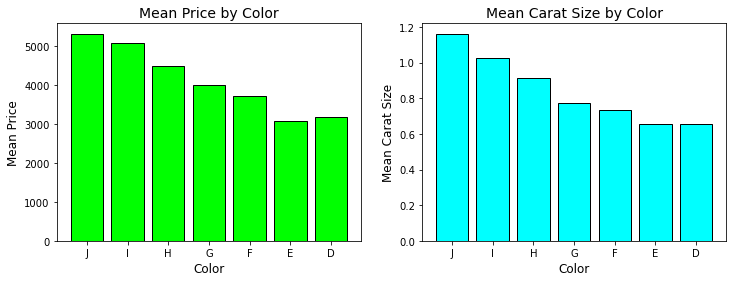

In [25]:
plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.bar(gb_color.index, height=gb_color.price, edgecolor='k', color=color_pal[0])
plt.title('Mean Price by Color', fontsize=14)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(gb_color.index, height=gb_color.carat, edgecolor='k', color=color_pal[1])
plt.title('Mean Carat Size by Color', fontsize=14)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Mean Carat Size', fontsize=12)

plt.show()

## Part 10: Grouping by Clarity
This section will be used to create a grouped dataframe displaying the mean price and carat size for each clarity level.

In [26]:
gb_clarity = diamonds.loc[:, ['clarity', 'price', 'carat']].\
    groupby(['clarity']).mean()

gb_clarity

,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


Here we will use bar charts to graphically display the information contained in the new gb_clarity dataframe.

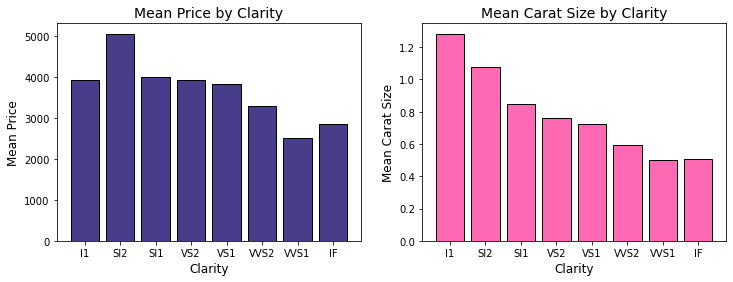

In [27]:
plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.bar(gb_clarity.index, height=gb_clarity.price, edgecolor='k', color=clarity_pal[0])
plt.title('Mean Price by Clarity', fontsize=14)
plt.xlabel('Clarity', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(gb_clarity.index, height=gb_clarity.carat, edgecolor='k', color=clarity_pal[1])
plt.title('Mean Carat Size by Clarity', fontsize=14)
plt.xlabel('Clarity', fontsize=12)
plt.ylabel('Mean Carat Size', fontsize=12)

plt.show()